<a href="https://colab.research.google.com/github/ababkoko/Tensorflow_prac/blob/master/Overfitting_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 과대적합(Overfitting) - 검증 세트에서 모델 성능이 최고점에 도달한 다음 감소하기 시작 할 때
2. 과소적합(Underfitting) - 테스트 세트의 성능이 향상될 여지가 있을 때

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [3]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
  # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다.
  results = np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0   # results[i]의 특정 인덱스만 1로 설정
  return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

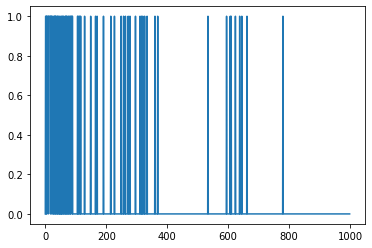

In [5]:
plt.plot(train_data[2])   # 단어 index는 빈도 순으로 정렬되어 있음

In [6]:
baseline_model = keras.Sequential([
    # '.summary' 메서드 때문에 'input_shape'가 필요함                               
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 4s - loss: 0.5573 - accuracy: 0.7324 - binary_crossentropy: 0.5573 - val_loss: 0.4192 - val_accuracy: 0.8233 - val_binary_crossentropy: 0.4192
Epoch 2/20
49/49 - 0s - loss: 0.3599 - accuracy: 0.8492 - binary_crossentropy: 0.3599 - val_loss: 0.3403 - val_accuracy: 0.8564 - val_binary_crossentropy: 0.3403
Epoch 3/20
49/49 - 0s - loss: 0.3196 - accuracy: 0.8686 - binary_crossentropy: 0.3196 - val_loss: 0.3318 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3318
Epoch 4/20
49/49 - 0s - loss: 0.3068 - accuracy: 0.8731 - binary_crossentropy: 0.3068 - val_loss: 0.3285 - val_accuracy: 0.8598 - val_binary_crossentropy: 0.3285
Epoch 5/20
49/49 - 0s - loss: 0.3037 - accuracy: 0.8738 - binary_crossentropy: 0.3037 - val_loss: 0.3387 - val_accuracy: 0.8560 - val_binary_crossentropy: 0.3387
Epoch 6/20
49/49 - 0s - loss: 0.3009 - accuracy: 0.8760 - binary_crossentropy: 0.3009 - val_loss: 0.3386 - val_accuracy: 0.8574 - val_binary_crossentropy: 0.3386
Epoch 7/20
49/49 - 0s - loss

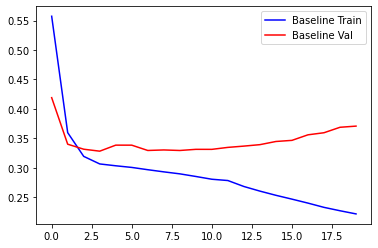

In [32]:
# 훈련 손실('binary_crossentropy'), 검증 손실('val_binary_crossentropy')
plt.plot(baseline_history.history['binary_crossentropy'], color='blue', label='Baseline Train')
plt.plot(baseline_history.history['val_binary_crossentropy'], color='red', label='Baseline Val')
plt.legend()
plt.show()

In [25]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')                                 
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [26]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6663 - accuracy: 0.5573 - binary_crossentropy: 0.6663 - val_loss: 0.6296 - val_accuracy: 0.6114 - val_binary_crossentropy: 0.6296
Epoch 2/20
49/49 - 0s - loss: 0.5899 - accuracy: 0.6864 - binary_crossentropy: 0.5899 - val_loss: 0.5565 - val_accuracy: 0.7310 - val_binary_crossentropy: 0.5565
Epoch 3/20
49/49 - 0s - loss: 0.5235 - accuracy: 0.7962 - binary_crossentropy: 0.5235 - val_loss: 0.5074 - val_accuracy: 0.8303 - val_binary_crossentropy: 0.5074
Epoch 4/20
49/49 - 0s - loss: 0.4856 - accuracy: 0.8407 - binary_crossentropy: 0.4856 - val_loss: 0.4814 - val_accuracy: 0.8352 - val_binary_crossentropy: 0.4814
Epoch 5/20
49/49 - 0s - loss: 0.4627 - accuracy: 0.8578 - binary_crossentropy: 0.4627 - val_loss: 0.4636 - val_accuracy: 0.8498 - val_binary_crossentropy: 0.4636
Epoch 6/20
49/49 - 0s - loss: 0.4289 - accuracy: 0.8656 - binary_crossentropy: 0.4289 - val_loss: 0.4056 - val_accuracy: 0.8548 - val_binary_crossentropy: 0.4056
Epoch 7/20
49/49 - 0s - loss

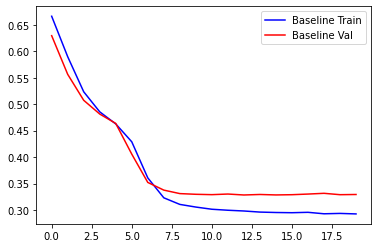

In [33]:
# 훈련 손실('binary_crossentropy'), 검증 손실('val_binary_crossentropy')
plt.plot(smaller_history.history['binary_crossentropy'], color='blue', label='Baseline Train')
plt.plot(smaller_history.history['val_binary_crossentropy'], color='red', label='Baseline Val')
plt.legend()
plt.show()

In [28]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [29]:
bigger_history = bigger_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4360 - accuracy: 0.7937 - binary_crossentropy: 0.4360 - val_loss: 0.3365 - val_accuracy: 0.8559 - val_binary_crossentropy: 0.3365
Epoch 2/20
49/49 - 0s - loss: 0.2924 - accuracy: 0.8782 - binary_crossentropy: 0.2924 - val_loss: 0.3316 - val_accuracy: 0.8559 - val_binary_crossentropy: 0.3316
Epoch 3/20
49/49 - 0s - loss: 0.2257 - accuracy: 0.9098 - binary_crossentropy: 0.2257 - val_loss: 0.3366 - val_accuracy: 0.8581 - val_binary_crossentropy: 0.3366
Epoch 4/20
49/49 - 0s - loss: 0.1172 - accuracy: 0.9632 - binary_crossentropy: 0.1172 - val_loss: 0.4203 - val_accuracy: 0.8466 - val_binary_crossentropy: 0.4203
Epoch 5/20
49/49 - 0s - loss: 0.0289 - accuracy: 0.9947 - binary_crossentropy: 0.0289 - val_loss: 0.5158 - val_accuracy: 0.8466 - val_binary_crossentropy: 0.5158
Epoch 6/20
49/49 - 0s - loss: 0.0065 - accuracy: 0.9996 - binary_crossentropy: 0.0065 - val_loss: 0.5953 - val_accuracy: 0.8515 - val_binary_crossentropy: 0.5953
Epoch 7/20
49/49 - 0s - loss

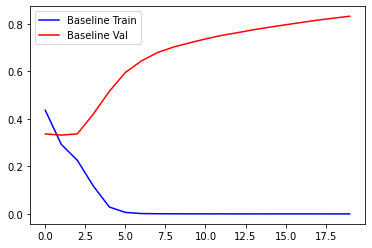

In [34]:
# 훈련 손실('binary_crossentropy'), 검증 손실('val_binary_crossentropy')
plt.plot(bigger_history.history['binary_crossentropy'], color='blue', label='Baseline Train')
plt.plot(bigger_history.history['val_binary_crossentropy'], color='red', label='Baseline Val')
plt.legend()
plt.show()

In [38]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data,
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6135 - accuracy: 0.7192 - binary_crossentropy: 0.5687 - val_loss: 0.4593 - val_accuracy: 0.8276 - val_binary_crossentropy: 0.4157
Epoch 2/20
49/49 - 0s - loss: 0.4038 - accuracy: 0.8526 - binary_crossentropy: 0.3599 - val_loss: 0.3826 - val_accuracy: 0.8559 - val_binary_crossentropy: 0.3390
Epoch 3/20
49/49 - 0s - loss: 0.3615 - accuracy: 0.8697 - binary_crossentropy: 0.3187 - val_loss: 0.3716 - val_accuracy: 0.8598 - val_binary_crossentropy: 0.3297
Epoch 4/20
49/49 - 0s - loss: 0.3497 - accuracy: 0.8721 - binary_crossentropy: 0.3087 - val_loss: 0.3682 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3282
Epoch 5/20
49/49 - 0s - loss: 0.3437 - accuracy: 0.8748 - binary_crossentropy: 0.3046 - val_loss: 0.3660 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3279
Epoch 6/20
49/49 - 0s - loss: 0.3413 - accuracy: 0.8756 - binary_crossentropy: 0.3039 - val_loss: 0.3637 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.3272
Epoch 7/20
49/49 - 0s - loss

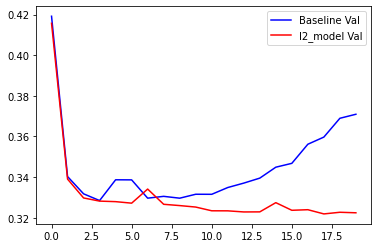

In [41]:
plt.plot(baseline_history.history['val_binary_crossentropy'], color='blue', label='Baseline Val')
plt.plot(l2_model_history.history['val_binary_crossentropy'], color='red', label='l2_model Val')
plt.legend()
plt.show()

In [42]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6825 - accuracy: 0.5511 - binary_crossentropy: 0.6825 - val_loss: 0.6318 - val_accuracy: 0.7320 - val_binary_crossentropy: 0.6318
Epoch 2/20
49/49 - 1s - loss: 0.5891 - accuracy: 0.6820 - binary_crossentropy: 0.5891 - val_loss: 0.4771 - val_accuracy: 0.8206 - val_binary_crossentropy: 0.4771
Epoch 3/20
49/49 - 0s - loss: 0.4875 - accuracy: 0.7721 - binary_crossentropy: 0.4875 - val_loss: 0.3831 - val_accuracy: 0.8449 - val_binary_crossentropy: 0.3831
Epoch 4/20
49/49 - 0s - loss: 0.4330 - accuracy: 0.8089 - binary_crossentropy: 0.4330 - val_loss: 0.3518 - val_accuracy: 0.8541 - val_binary_crossentropy: 0.3518
Epoch 5/20
49/49 - 0s - loss: 0.4007 - accuracy: 0.8293 - binary_crossentropy: 0.4007 - val_loss: 0.3359 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3359
Epoch 6/20
49/49 - 0s - loss: 0.3834 - accuracy: 0.8390 - binary_crossentropy: 0.3834 - val_loss: 0.3310 - val_accuracy: 0.8575 - val_binary_crossentropy: 0.3310
Epoch 7/20
49/49 - 0s - loss

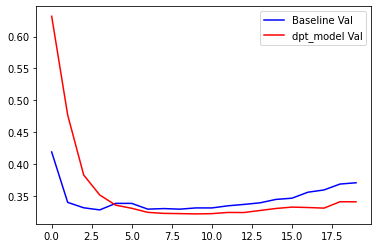

In [43]:
plt.plot(baseline_history.history['val_binary_crossentropy'], color='blue', label='Baseline Val')
plt.plot(dpt_model_history.history['val_binary_crossentropy'], color='red', label='dpt_model Val')
plt.legend()
plt.show()